# Angular Quadratures for 3D SN Transport

This notebook illustrates the different angular quadrature sets used in 3D discrete ordinates (SN) transport calculations.

In SN methods, the angular dependence of the radiation transport equation is discretized using a finite set of discrete directions $\Omega_n$ with associated weights $w_n$. The choice of these directions and weights has consequences in accuracy and efficiency.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.patches as mpatches

## 1. Level Symmetric (LQN) Quadrature

The most common quadrature set for Cartesian geometry. Points are arranged in levels perpendicular to the diagonal of the octant.

Properties:
- Octahedral symmetry (invariant under 90° rotations)
- Number of directions per octant: $N(N+2)/8$ where N is the SN order
- Well-suited for problems with Cartesian geometry

In [2]:
# Chose the quadrature order (S4, S6, S8, S12, S16)

xsn = [2, 4, 6, 8, 12, 16]
xdir = "Figs"

In [3]:
# Level Symmetric Quadrature Data for 3D Angular Quadratures (from Lewis and Miller, "Computational Methods of Neutron Transport", 1993)

mu1_LM = {2: 0.5773503,
          4: 0.3500212,
          6: 0.2666355,
          8: 0.2182179,
          12: 0.1672126,
          16: 0.1543735 }

ws_LM = {2: [1.],
        4: [1/3.],
        6: [0.1761263, 0.1572071],
        8: [0.1209877, 0.0907407, 0.0925926],
        12: [0.0707626, 0.0558811, 0.0373377, 0.0502819, 0.0258513],
        16: [0.0489872, 0.0413296, 0.0212326, 0.0256207, 0.0360486, 0.0144589, 0.0344958, 0.0085179] }

In [4]:
# Functions to generate level symmetric angles and weights from the first direction cosine (mu1) and from the data in Lewis & Miller.


def level_symmetric_mus(sn, mu1=None):
    """Generate level symmetric cosines for a given S_n quadrature set.
    mu1 the first direction cosine. If not given, values are taken from Lewis & Miller."""
    
    
    if mu1 is None:
        mu1 = mu1_LM.get(sn, None)
        if mu1 is None:
            raise ValueError(f"S{sn} quadrature not implemented")

    mus = [mu1*mu1]
    if sn > 2:
        C = 2*(1-3*mu1*mu1)/(sn-2)
        for i in range(2, sn//2 + 1):
            mus.append(mu1*mu1 + C*(i-1))
    mus = np.sqrt(np.array(mus))
    return mus


def level_symmetric_directions(sn):
    """Return the direction from the level symmetric cosines for a given S_n quadrature set."""
    if sn == 2:
        m1 = level_symmetric_mus(sn)[0]
        dirs = [(m1, m1, m1)]
    elif sn == 4:
        m1, m2 = level_symmetric_mus(sn)
        dirs = [(m1, m1, m2),
                (m1, m2, m1), (m2, m1, m1)]
    elif sn == 6:
        m1, m2, m3 = level_symmetric_mus(sn)
        dirs = [(m1, m1, m3),
                (m1, m2, m2), (m2, m1, m2),
                (m1, m3, m1), (m2, m2, m1), (m3, m1, m1)]
    elif sn == 8:
        m1, m2, m3, m4 = level_symmetric_mus(sn)
        dirs = [(m1, m1, m4),
                (m1, m2, m3), (m2, m1, m3),
                (m1, m3, m2), (m2, m2, m2), (m3, m1, m2),
                (m1, m4, m1), (m2, m3, m1), (m3, m2, m1), (m4, m1, m1)]
    elif sn == 12:
        m1, m2, m3, m4, m5, m6 = level_symmetric_mus(sn)
        dirs = [(m1, m1, m6),
                (m1, m2, m5), (m2, m1, m5),
                (m1, m3, m4), (m2, m2, m4), (m3, m1, m4),
                (m1, m4, m3), (m2, m3, m3), (m3, m2, m3), (m4, m1, m3),
                (m1, m5, m2), (m2, m4, m2), (m3, m3, m2), (m4, m2, m2), (m5, m1, m2),
                (m1, m6, m1), (m2, m5, m1), (m3, m4, m1), (m4, m3, m1), (m5, m2, m1), (m6, m1, m1)]
    elif sn == 16:        
        m1, m2, m3, m4, m5, m6, m7, m8 = level_symmetric_mus(sn)
        dirs = [(m1, m1, m8),
                (m1, m2, m7), (m2, m1, m7),
                (m1, m3, m6), (m2, m2, m6), (m3, m1, m6),
                (m1, m4, m5), (m2, m3, m5), (m3, m2, m5), (m4, m1, m5),
                (m1, m5, m4), (m2, m4, m4), (m3, m3, m4), (m4, m2, m4), (m5, m1, m4),
                (m1, m6, m3), (m2, m5, m3), (m3, m4, m3), (m4, m3, m3), (m5, m2, m3), (m6, m1, m3),
                (m1, m7, m2), (m2, m6, m2), (m3, m5, m2), (m4, m4, m2), (m5, m3, m2), (m6, m2, m2), (m7, m1, m2),
                (m1, m8, m1), (m2, m7, m1), (m3, m6, m1), (m4, m5, m1), (m5, m4, m1), (m6, m3, m1), (m7, m2, m1), (m8, m1, m1)]
    return np.array(dirs)


def level_symmetric_weights(sn):
    """Return the weights for a given S_n quadrature set."""
    if sn==2:
        ws = [1.]
    elif sn==4:
        w1 = ws_LM[4][0]
        ws = 3*[w1]
    elif sn==6:
        w1, w2 = ws_LM[6]
        ws = [w1, 
              w2, w2, 
              w1, w2, w1]
    elif sn==8:
        w1, w2, w3 = ws_LM[8]
        ws = [w1, 
              w2, w2, 
              w2, w3, w2, 
              w1, w2, w2, w1]
    elif sn==12:
        w1, w2, w3, w4, w5 = ws_LM[12]
        ws = [w1, 
              w2, w2, 
              w3, w4, w3, 
              w3, w5, w5, w3, 
              w2, w4, w5, w4, w2, 
              w1, w2, w3, w3, w2, w1]
    elif sn==16:
        w1, w2, w3, w4, w5, w6, w7, w8 = ws_LM[16]
        ws = [w1, 
              w2, w2, 
              w3, w5, w3, 
              w4, w6, w6, w4, 
              w4, w7, w8, w7, w4, 
              w3, w6, w8, w8, w6, w3,   
              w2, w5, w6, w7, w6, w5, w2, 
              w1, w2, w3, w4, w4, w3, w2, w1]
    else:
        raise ValueError(f"S{sn} quadrature weights not implemented")
    return np.array(ws) 

for sn in [2, 4, 6, 8, 12, 16]:
    mus = level_symmetric_mus(sn)
    print(f"S{sn}: {mus}")

S2: [0.5773503]
S4: [0.3500212  0.86889028]
S6: [0.2666355  0.68150771 0.92618088]
S8: [0.2182179  0.57735027 0.78679579 0.95118973]
S12: [0.1672126  0.45954763 0.6280191  0.76002102 0.87227056 0.97163774]
S16: [0.1543735  0.39556916 0.53769763 0.64943246 0.74458465 0.82888484
 0.90536946 0.97587788]


## 2. Utility Functions for Octant Only

In [5]:
def verify_quadrature(directions, weights):
    """Verify quadrature properties"""
    # Check normalization: sum of weights should equal 1.0 for octant
    total_weight = np.sum(weights)
    print(f"Total weight: {total_weight:.6f} (should be 1.0 for octant)")
    
    # Check first moment (should integrate to zero for symmetric quadrature)
    first_moment = np.sum(weights[:, np.newaxis] * directions, axis=0)
    print(f"First moment: {first_moment} (should be ~[0, 0, 0])")
    
    # Check that all directions are unit vectors
    norms = np.linalg.norm(directions, axis=1)
    print(f"Direction norms - min: {norms.min():.6f}, max: {norms.max():.6f} (should be ~1.0)")

## 3. Visualization of Angular Directions

In [6]:
def plot_unit_sphere_with_directions(sn, directions, weights, title="Angular Quadrature"):
    """Plot directions on the unit sphere (octant only)"""
    #fig = plt.figure(figsize=(12, 10))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Draw unit sphere (octant only)
    u = np.linspace(0, 2 * np.pi, 50)
    v = np.linspace(0, np.pi, 50)
    x_sphere = np.outer(np.cos(u), np.sin(v))
    y_sphere = np.outer(np.sin(u), np.sin(v))
    z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
    
    # Only show first octant of sphere
    mask = (x_sphere >= 0) & (y_sphere >= 0) & (z_sphere >= 0)
    x_sphere = np.where(mask, x_sphere, np.nan)
    y_sphere = np.where(mask, y_sphere, np.nan)
    z_sphere = np.where(mask, z_sphere, np.nan)
    
    ax.plot_surface(x_sphere, y_sphere, z_sphere, alpha=0.1, color='cyan', edgecolor='none')
    
    # Convert directions to spherical coordinates for parallels and meridians
    phi_values = []  # colatitude
    theta_values = []  # azimuth
    
    for direction in directions:
        x, y, z = direction
        phi = np.arccos(z)  # colatitude
        theta = np.arctan2(y, x)  # azimuth
        phi_values.append(phi)
        theta_values.append(theta)
    
    phi_values = np.array(phi_values)
    theta_values = np.array(theta_values)
    
    # Get unique values with tolerance for floating point
    phi_unique = np.unique(np.round(phi_values, 6))
    theta_unique = np.unique(np.round(theta_values, 6))
    
    # # Plot meridians (constant theta) through direction points
    # for theta_val in theta_unique:
    #     phi = np.linspace(0, np.pi/2, 30)
    #     x_merid = np.sin(phi) * np.cos(theta_val)
    #     y_merid = np.sin(phi) * np.sin(theta_val)
    #     z_merid = np.cos(phi)
    #     ax.plot(x_merid, y_merid, z_merid, 'blue', alpha=0.8, linewidth=2)
    
    # Plot parallels (constant phi) through direction points
    for phi_val in phi_unique:
        theta = np.linspace(0, np.pi/2, 30)
        x_para = np.sin(phi_val) * np.cos(theta)
        y_para = np.sin(phi_val) * np.sin(theta)
        z_para = np.cos(phi_val) * np.ones_like(theta)
        ax.plot(x_para, y_para, z_para, 'blue', alpha=0.8, linewidth=1.5)
    
    # Plot directions as points and vectors
    # Normalize weights for coloring
    weights_norm = weights / weights.max()
    
    for i, (direction, weight) in enumerate(zip(directions, weights_norm)):
        color = cm.viridis(weight)
        # Plot point on sphere
        ax.scatter(*direction, s=100*weight*2, c=[color], alpha=0.8, edgecolors='black', linewidth=1.5)
        # Plot vector from origin
        ax.quiver(0, 0, 0, direction[0], direction[1], direction[2], 
                 color=color, alpha=0.8, arrow_length_ratio=0.1, linewidth=1.5)
    
    # Draw coordinate axes as black lines
    axis_length = 1.2
    #ax.plot([0, axis_length], [0, 0], [0, 0], color='k', alpha=0.5, linewidth=2)
    #ax.plot([0, 0], [0, axis_length], [0, 0], color='k', alpha=0.5, linewidth=2)
    #ax.plot([0, 0], [0, 0], [0, axis_length], color='k', alpha=0.5, linewidth=2)
    
    #ax.text(axis_length, 0, 0, 'X', fontsize=12, color='k')
    #ax.text(0, axis_length, 0, 'Y', fontsize=12, color='k')
    #ax.text(0, 0, axis_length, 'Z', fontsize=12, color='k')
    
    # Set viewing angle so arrows point towards viewer
    ax.view_init(elev=20, azim=30)
    
    # Set equal aspect ratio and labels
    max_range = 1.2
    ax.set_xlim([0, max_range])
    ax.set_ylim([0, max_range])
    ax.set_zlim([0, max_range])
    ax.set_xlabel('X (ξ)')
    ax.set_ylabel('Y (η)')
    ax.set_zlabel('Z (μ)')
    ax.set_title(title, fontweight='bold')
    
    # Add colorbar for weights
    sm = cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(vmin=weights.min(), vmax=weights.max()))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, shrink=0.5, pad=0.1)
    cbar.set_label('Quadrature Weight', fontsize=10)
    
    plt.tight_layout()
    plt.draw()
    plt.savefig(f"{xdir}/S{sn}_quadrature_directions.png")
    #plt.close()


In [7]:
def plot_xy_projection(sn, directions, weights, title="XY Projection"):
    """Plot directions projected onto the X-Y plane (octant only: x >= 0, y >= 0)"""
    fig, ax = plt.subplots()
    
    # Project directions onto X-Y plane
    x_proj = directions[:, 0]
    y_proj = directions[:, 1]
    
    # Filter to first octant only (x >= 0, y >= 0)
    octant_mask = (x_proj >= 0) & (y_proj >= 0)
    x_octant = x_proj[octant_mask]
    y_octant = y_proj[octant_mask]
    w_octant = weights[octant_mask]
    
    # Normalize weights for sizing
    w_norm = w_octant / w_octant.max() if len(w_octant) > 0 else w_octant
    
    # Create scatter plot with colorbar
    scatter = ax.scatter(x_octant, y_octant, s=200*w_norm, c=w_octant, cmap='viridis', 
                        edgecolors='black', linewidth=1.5, alpha=0.8)
    
    # Draw unit circle arc in X-Y plane (octant only)
    theta_octant = np.linspace(0, np.pi/2, 50)
    ax.plot(np.cos(theta_octant), np.sin(theta_octant), 'k--', alpha=0.3, linewidth=1.5, label='Unit circle')
    
    # Draw octant boundary axes
    ax.axhline(y=0, color='k', alpha=0.4, linewidth=1)
    ax.axvline(x=0, color='k', alpha=0.4, linewidth=1)
    
    # Draw grid
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')
    ax.set_xlabel('X (ξ)', fontsize=12)
    ax.set_ylabel('Y (η)', fontsize=12)
    ax.set_title(title, fontweight='bold')
    ax.set_xlim(-0.1, 1.2)
    ax.set_ylim(-0.1, 1.2)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Weight', fontsize=10)
    ax.legend(loc='upper right')
    
    plt.tight_layout()
    plt.draw()
    plt.savefig(f"{xdir}/S{sn}_xy_projection.png")
    #plt.close()


## 4. Visualize Different SN Orders - First Octant Only

[[0.5773503 0.5773503 0.5773503]]
[1.]
S2 Level Symmetric Quadrature - First Octant Only

Directions in first octant: 1

[[0.3500212  0.3500212  0.86889028]
 [0.3500212  0.86889028 0.3500212 ]
 [0.86889028 0.3500212  0.3500212 ]]
[0.33333333 0.33333333 0.33333333]
S4 Level Symmetric Quadrature - First Octant Only

Directions in first octant: 3

[[0.2666355  0.2666355  0.92618088]
 [0.2666355  0.68150771 0.68150771]
 [0.68150771 0.2666355  0.68150771]
 [0.2666355  0.92618088 0.2666355 ]
 [0.68150771 0.68150771 0.2666355 ]
 [0.92618088 0.2666355  0.2666355 ]]
[0.1761263 0.1572071 0.1572071 0.1761263 0.1572071 0.1761263]
S6 Level Symmetric Quadrature - First Octant Only

Directions in first octant: 6

[[0.2182179  0.2182179  0.95118973]
 [0.2182179  0.57735027 0.78679579]
 [0.57735027 0.2182179  0.78679579]
 [0.2182179  0.78679579 0.57735027]
 [0.57735027 0.57735027 0.57735027]
 [0.78679579 0.2182179  0.57735027]
 [0.2182179  0.95118973 0.2182179 ]
 [0.57735027 0.78679579 0.2182179 ]
 [0.

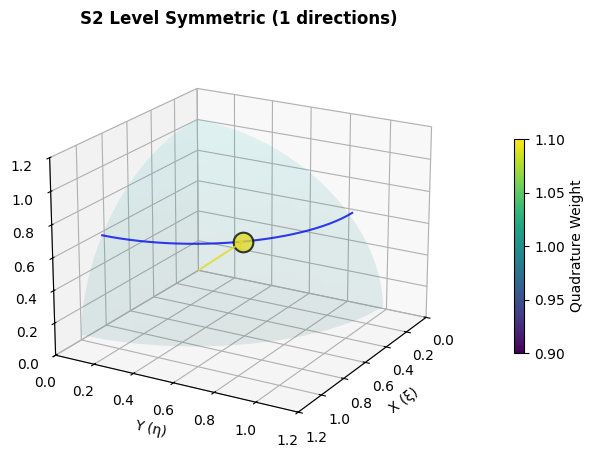

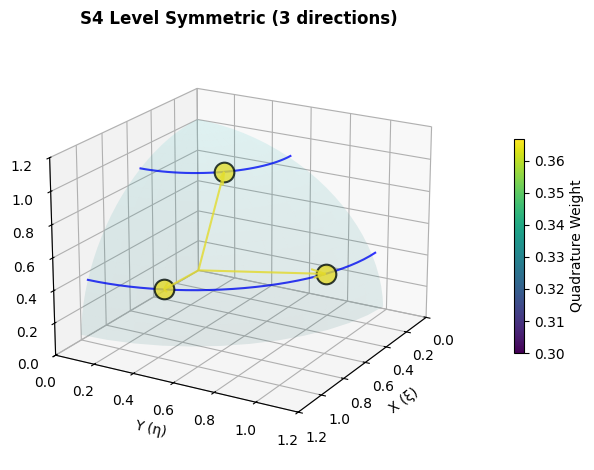

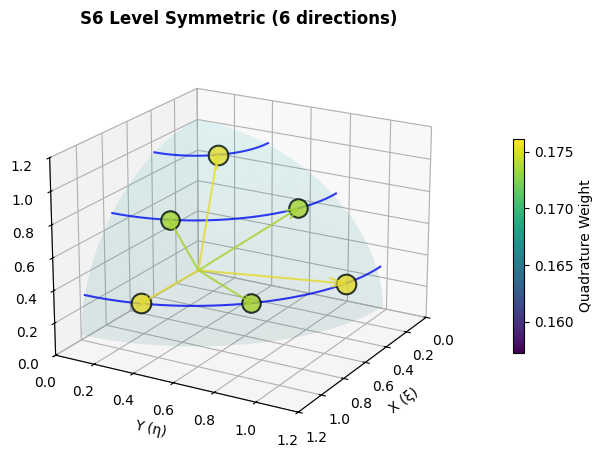

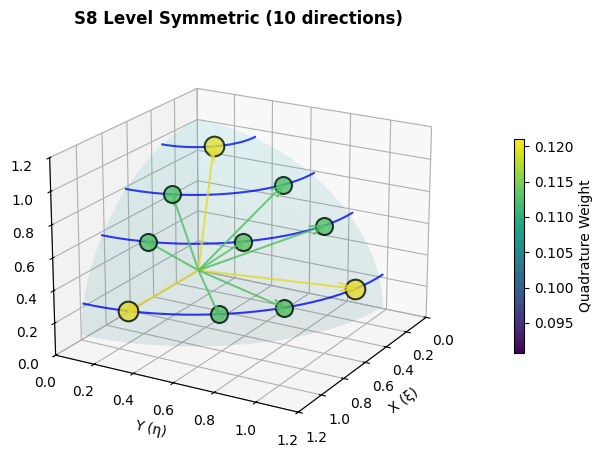

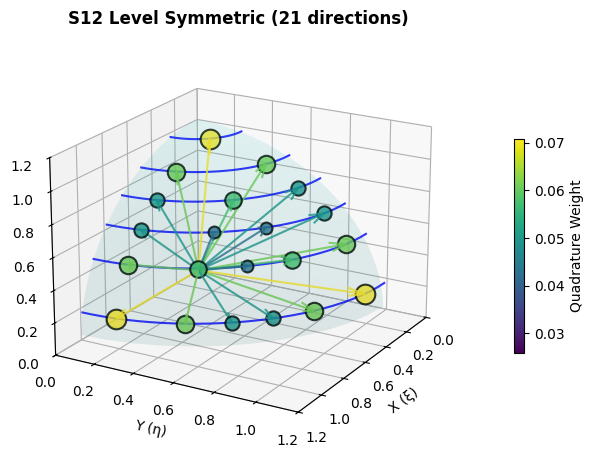

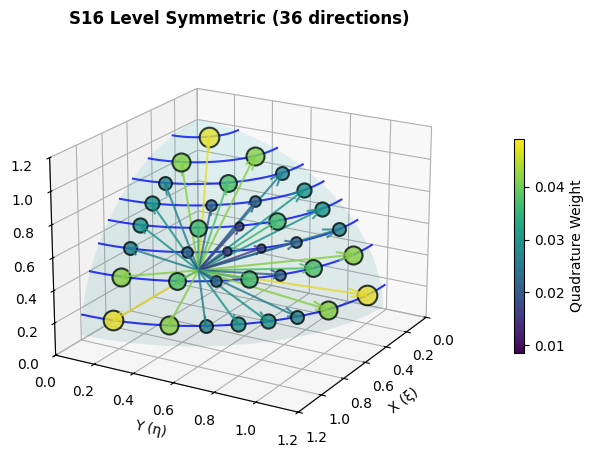

In [8]:
# SN Quadrature (3D plot)

for sn in xsn:
    dirs = level_symmetric_directions(sn)
    wts = level_symmetric_weights(sn)
    print(dirs)
    print(wts)
    print(f"S{sn} Level Symmetric Quadrature - First Octant Only")
    print("="*50)
    nb_dirs = len(dirs)
    print(f"\nDirections in first octant: {nb_dirs}\n")
    title = f"S{sn} Level Symmetric ({nb_dirs} directions)"
    plot_unit_sphere_with_directions(sn, dirs, wts, title)

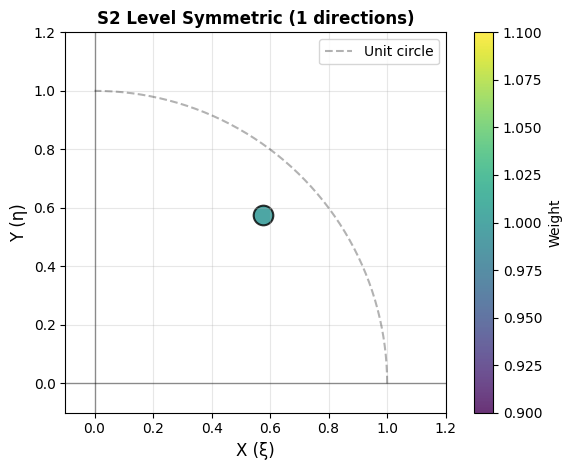

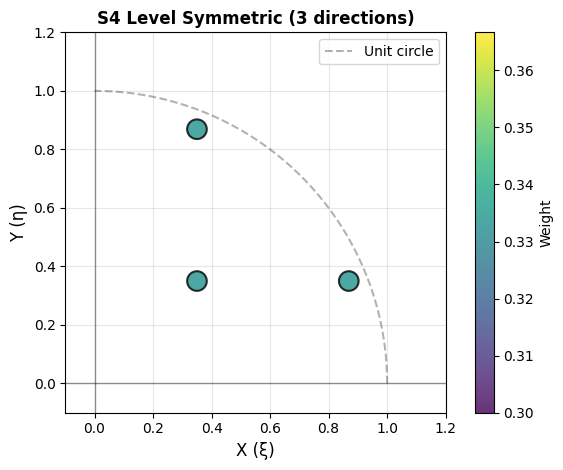

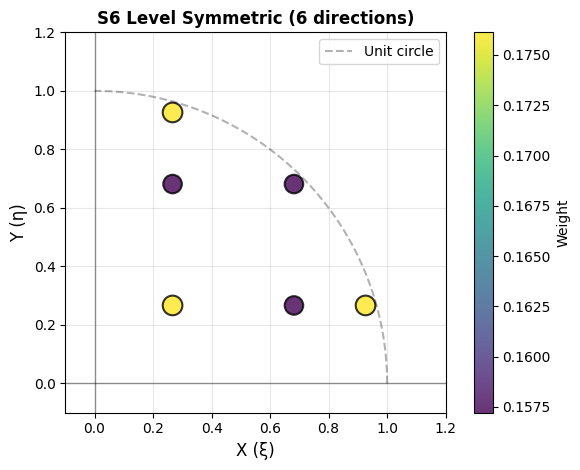

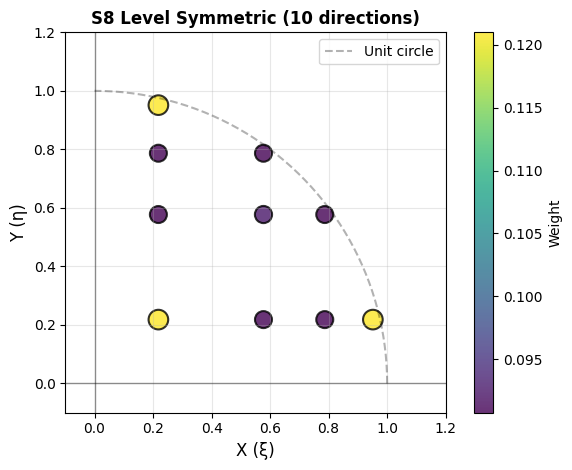

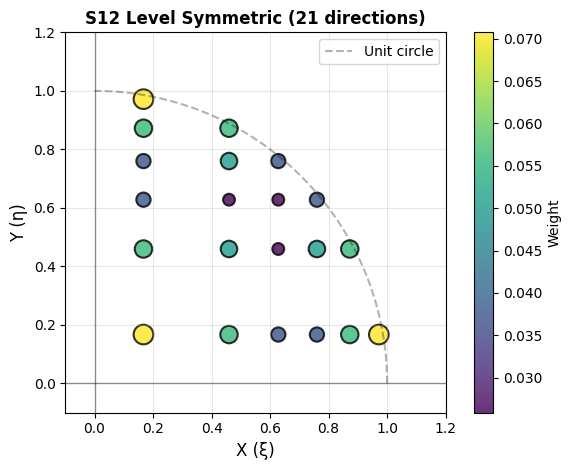

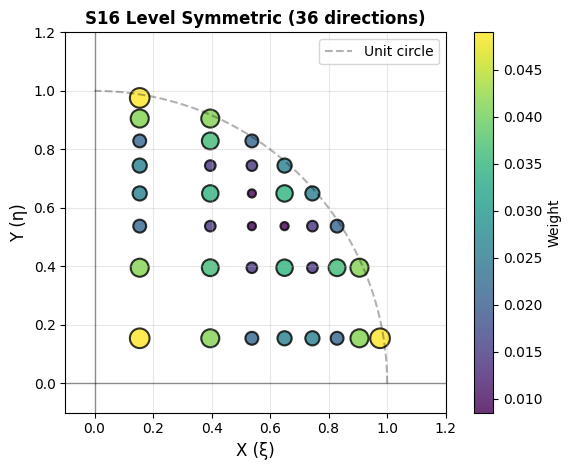

In [10]:
# SN Quadrature (XY projection)
for sn in xsn:
    dirs = level_symmetric_directions(sn)
    wts = level_symmetric_weights(sn)
    nb_dirs = len(dirs)
    title = f"S{sn} Level Symmetric ({nb_dirs} directions)"
    plot_xy_projection(sn, dirs, wts, title)